# Face Swapping Colab
## Original code credit to: https://github.com/wuhuikai/FaceSwap

This colab notebook is going to faceswap between ttwo face pictures. This is a baseline for full synthetic face replacement. Synthettic facegeneraiton will be compartmentalized as a random distribution and existing dataset is readily available. 

In [10]:
#load libraries 
!pip install dlib 
!pip install numpy
!pip install scipy
!pip install deepface

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-3.11.1-cp36-none-any.whl size=9656 sha256=6b77168055e4f426cc97d307e5d8fb2b25611acc2448d4e795d53a6948c068a6
  Stored in directory: /root/.cache/pip/wheels/32/8e/8d/0fec7d933759a0880dc34be487e1d92c51ba8fdf4e9f265ff7
Successfully built gdown
  Found existing installation: gdown 3.6.4
    Uninstalling gdown-3.6.4:
      Successfully uninstalled gdown-3.6.4


In [6]:
#upload src photo
from google.colab import files
file=files.upload()
#extracting files names
src = []
for fn in file.keys():
  src.append(fn)

Saving woman.jpg to woman (1).jpg


In [7]:
#upload destination photo 
from google.colab import files
file=files.upload()
#extracting files names
dst = []
for fn in file.keys():
  dst.append(fn)

Saving sylvester-stallone.jpg to sylvester-stallone.jpg


True


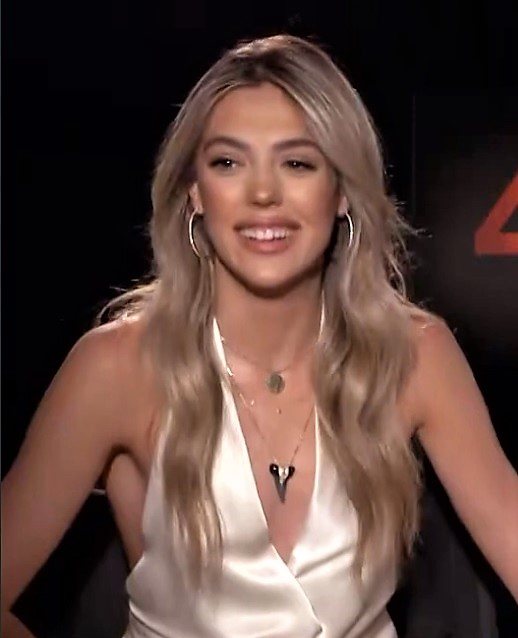

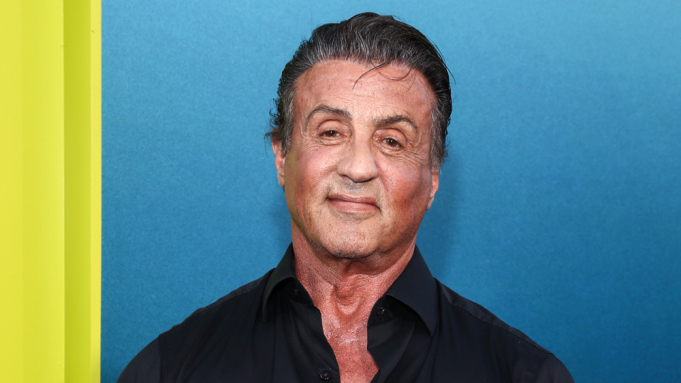

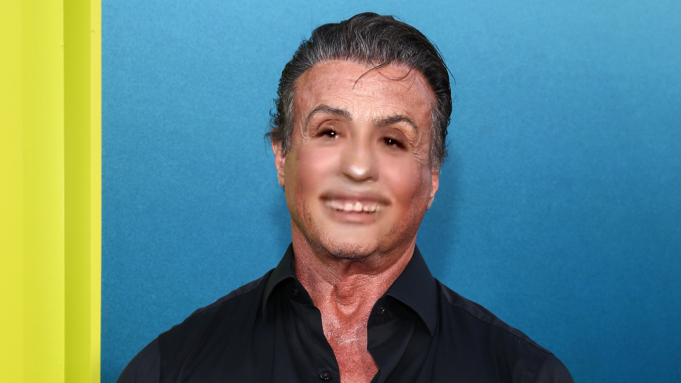

In [13]:
from face_detection import select_face
from face_swap import face_swap
import cv2
from google.colab.patches import cv2_imshow

if src[0].lower().endswith(('.jpg', '.jpeg')):
  src_img_pth = src[0] 
  dst_img_pth = dst[0]
else:
  exit("Wrong file types")

src_img = cv2.imread(src_img_pth)
dst_img = cv2.imread(dst_img_pth)
# Select src face
src_points, src_shape, src_face = select_face(src_img)
dst_points, dst_shape, dst_face = select_face(dst_img)
class Foo(object):
    pass
args = Foo()
args.correct_color = True
args.warp_2d = False
#setattr(args, 'correct_color', True)

print(args.correct_color)
output = face_swap(src_face, dst_face, src_points, dst_points, dst_shape, dst_img, args)
cv2_imshow(src_img)
cv2_imshow(dst_img)
cv2_imshow(output)

In [14]:
from deepface import DeepFace
demography = DeepFace.analyze(src[0], actions = ['age', 'gender', 'race', 'emotion'])

Actions to do:  ['age', 'gender', 'race', 'emotion']


Analyzing:   0%|          | 0/1 [00:02<?, ?it/s]


In [12]:
print(demography)

{'age': 29.309649761574992, 'gender': 'Woman', 'race': {'asian': 12.555333971977234, 'indian': 2.3830443620681763, 'black': 0.5152176599949598, 'white': 49.72096383571625, 'middle eastern': 14.251327514648438, 'latino hispanic': 20.574112236499786}, 'dominant_race': 'white', 'emotion': {'angry': 0.003951816795936367, 'disgust': 8.278786217594704e-05, 'fear': 1.5009902344334405, 'happy': 97.33590451906973, 'sad': 0.6131002479017076, 'surprise': 0.004218639290179898, 'neutral': 0.5417553422457387}, 'dominant_emotion': 'happy'}
